Test slab_model.py
==================

Jinbo Wang

Jinbo.Wang@jpl.nasa.gov

last update: 12/28/2021

copied from test_slab_model.ipynb

In [1]:
import slab_model
import pylab as plt
import numpy as np
import xarray as xr
from popy import utils
from scipy.io import loadmat
import pandas as pd
from scipy.interpolate import interp1d

xrod=xr.open_dataset

# WaCM was generated from the original

Highpass filtering and detides will be performed on the simulated WaCM data.

In [7]:
import slab_model
import pylab as plt
import numpy as np
import xarray as xr
from popy import utils
from scipy.io import loadmat
import pandas as pd


xrod=xr.open_dataset
t0,t1='2007-09-20','2007-09-29'

#load data station papa
fn='data/from_Hong/PaPa2.mat'
lat0=50.01
tt=pd.date_range('2007-06-08 04:00:00',periods=8541,freq='1h')


#fn='../data/from_Hong/KEO2.mat'
#lat0=32.3
#tt=pd.date_range('2007-09-26 11:00:00',periods=8255,freq='1h')
#t0,t1='2007-11-20','2007-12-20'
#t0,t1='2007-12-13','2008-01-30'

d=loadmat(fn)
display(d)
#load velocity and create xarrays 
vobs=xr.DataArray(d['VV_obs'][:].flatten(),dims=('time'),coords={'time':tt} )
uobs=xr.DataArray(d['UU_obs'][:].flatten(),dims=('time'),coords={'time':tt} )
#load winds and create xarrays
vwobs=xr.DataArray(d['Vwind_o'][:].flatten(),dims=('time'),coords={'time':tt} )#.sel(time=slice(t0,t1))
uwobs=xr.DataArray(d['Uwind_o'][:].flatten(),dims=('time'),coords={'time':tt} )#.sel(time=slice(t0,t1))

orbit='500_1000'
orbit='700_1800'

d700=slab_model.synthetic_wacm([uobs,vobs,uwobs,vwobs],lat0,215.1,
                               cutoff_truth=1/3,cutoff_wacm=1/20,
                               orbit=orbit)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb 10 09:55:41 2021',
 '__version__': '1.0',
 '__globals__': [],
 'UU_mod5': array([[ 0.03583284,  0.01757355,  0.00648399, ..., -0.01408401,
         -0.05893151, -0.08547649]]),
 'UU_modt': array([[ 0.07692069,  0.07131265,  0.04977461, ..., -0.04035816,
         -0.10599446, -0.15096961]]),
 'UU_modx': array([[ 0.12854221,  0.08845857,  0.04471025, ..., -0.07301505,
         -0.09376827, -0.10502825]]),
 'UU_obs': array([[ 0.116,  0.09 ,  0.082, ...,  0.015, -0.035, -0.056]]),
 'Uwind_5': array([[2.94078541],
        [2.74555874],
        [2.7324481 ],
        ...,
        [2.65435362],
        [2.15881205],
        [1.83384752]]),
 'Uwind_o': array([[3.73114228],
        [2.72561145],
        [2.8440764 ],
        ...,
        [2.59516883],
        [2.03874183],
        [1.33574319]]),
 'Uwind_x': array([[2.34494846],
        [2.49465886],
        [2.64436925],
        ...,
        [2.72765225],
        [2.63

seperate hourly truth into low and high frequencies
Remove tides from high-frequency truth
bandpass to get true NIO
generate synthetic wacm


AttributeError: 'str' object has no attribute 'min'

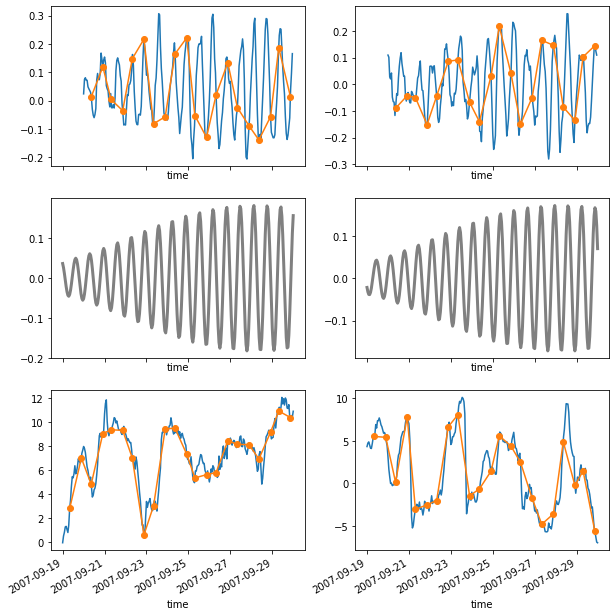

In [8]:
t0,t1='2007-09-20','2007-09-29'

fig,ax=plt.subplots(3,2,figsize=(10,10),sharex=True,)
t00,t11=np.datetime64(t0)-np.timedelta64(1,'D'),np.datetime64(t1)+np.timedelta64(1,'D')


d700.u_truth_total.sel(time=slice(t0,t1)).plot(ax=ax[0,0],label='truth')
d700.u_wacm_total.sel(time=slice(t0,t1)).plot(ax=ax[0,0],marker='o',label='WaCM')

#d700.u_truth_high_notide.sel(time=slice(t0,t1)).plot(ax=ax[0,0])
#d700.u_wacm_high_notide.sel(time=slice(t0,t1)).plot(ax=ax[0,0],marker='o')

d700.v_truth_total.sel(time=slice(t0,t1)).plot(ax=ax[0,1],label='truth')
d700.v_wacm_total.sel(time=slice(t0,t1)).plot(ax=ax[0,1],marker='o',label='WaCM')

#d700.v_truth_high_notide.sel(time=slice(t0,t1)).plot(ax=ax[0,1])
#d700.v_wacm_high_notide.sel(time=slice(t0,t1)).plot(ax=ax[0,1],marker='o')

d700.uw_truth.sel(time=slice(t00,t11)).plot(ax=ax[2,0],label='truth')
d700.uw_wacm.sel(time=slice(t00,t11)).plot(ax=ax[2,0],marker='o',label='WaCM')


d700.vw_truth.sel(time=slice(t00,t11)).plot(ax=ax[2,1],label='truth')
d700.vw_wacm.sel(time=slice(t00,t11)).plot(ax=ax[2,1],marker='o',label='WaCM')

d700.u_truth_high_notide_nio.sel(time=slice(t00,t11)).plot(ax=ax[1,0],label='truth',color='gray',lw=3)
d700.v_truth_high_notide_nio.sel(time=slice(t00,t11)).plot(ax=ax[1,1],label='truth',color='gray',lw=3)

up,vp,_=d700.get_wacm_nio(t0,t1,use_hourly_wind=True)
up.plot(ax=ax[1,0],label='from hourly wind',color='r',lw=2)
vp.plot(ax=ax[1,1],label='from hourly wind',color='r',lw=2)

upp,vpp,_=d700.get_wacm_nio(t0,t1,use_hourly_wind=False)
upp.plot(ax=ax[1,0],label='from WaCM wind',color='g',lw=2,linestyle='--')
vpp.plot(ax=ax[1,1],label='from WaCM wind',color='g',lw=2,linestyle='--')


ax[0,0].set_title('zonal velocity')
ax[0,1].set_title('meridional velocity')

ax[1,0].set_title('NIO zonal velocity')
ax[1,1].set_title('NIO meridional velocity')

ax[2,0].set_title('zonal wind')
ax[2,1].set_title('meridional wind')


for i in range(2):
    for a in ax[:,i]:
        a.legend(loc='lower left')
        
for j in range(3):
    for i in range(2):
        ax[j,i].set_xlabel('')
        ax[j,i].grid(True)
    ax[j,0].set_ylabel('m/s')
ax[1,0].set_ylim(-0.4,0.4)
ax[1,1].set_ylim(-0.4,0.4)
ax[0,0].set_ylim(-0.4,0.4)
ax[0,1].set_ylim(-0.4,0.4)

ax[2,0].set_xlim(up.time[0],up.time[-1])
ax[2,1].set_xlim(up.time[0],up.time[-1])

plt.tight_layout()
#plt.savefig('figures/hourly_vs_wacm_wind_%s.pdf'%orbit)
#plt.savefig('figures/hourly_vs_wacm_wind_%s.png'%orbit,dpi=300)

In [ ]:
t_center='2007-09-15'
fig,ax=plt.subplots(3,1,figsize=(20,10),sharex=True)
time=d700.u_wacm_total.time.values[10:]

for i in range(1):
    for j in np.arange(0,time.size-1,4)[:1]:
        t0=time[j];t1=time[j+20]
        t0=np.datetime64('2007-09-20')
        t1=np.datetime64('2007-09-29')
       
        #t0=np.datetime64('2007-07-18')
        #t1=np.datetime64('2007-07-31')
        
        ut=d700.u_wacm_total.sel(time=slice(t0,t1))
        print(ut.size)
        t0=ut.time.data[0]
        t1=ut.time.data[-1]
        
        ut.plot(ax=ax[2],color='purple',marker='o')
        
        up,vp,param=d700.get_wacm_nio(t0,t1,has_tides=True,use_hourly_wind=True)
        up.plot(ax=ax[0],label='%i'%i,marker='+')
        ut0= (ut -d700.u_truth_high_tide.interp(time=ut.time.values) 
              - up.interp(time=ut.time.values)).interp(time=up.time.values)+up+d700.u_truth_high_tide.interp(time=up.time.values)
        ut0.plot(ax=ax[2],color='r',)
        
        up,vp,param=d700.get_wacm_nio(t0,t1,use_hourly_wind=False)
        up.plot(ax=ax[1],label='%i'%i,marker='+')
        ut0= (ut -d700.u_truth_high_tide.interp(time=ut.time.values) 
              - up.interp(time=ut.time.values)).interp(time=up.time.values)+up+d700.u_truth_high_tide.interp(time=up.time.values)
        ut0.plot(ax=ax[2],color='g',)
        
        d700.u_truth_high_notide_nio.sel(time=slice(t0,t1)).plot(ax=ax[0],color='k',lw=3)
        d700.u_wacm_high.sel(time=slice(t0,t1)).plot(ax=ax[0],color='k',marker='o')
        
        d700.u_truth_high_notide_nio.sel(time=slice(t0,t1)).plot(ax=ax[1],color='k',lw=3)
        d700.u_wacm_high.sel(time=slice(t0,t1)).plot(ax=ax[1],color='k',marker='o')
        d700.u_truth_high_notide.sel(time=slice(t0,t1)).plot(ax=ax[1],color='k',marker='+')
        
        d700.u_truth_total.sel(time=slice(t0,t1)).plot(ax=ax[2],color='k')
        
ax[0].legend()